In [1]:
import sys

sys.path.append("..")

In [6]:
# 1. Basic Environment Structure
from qurious.environments.grid_world import GridWorld

# Create a simple 4x4 grid world with default settings
env = GridWorld(width=4, height=4, obstacles=[(1, 1), (2, 2), (1, 2), (2, 1)])

# Visualize the initial state
print("Initial state of the environment:")
print(env.render())

# Understanding the state representation
state = env.get_state()
print(f"State index: {state}")
print(f"Position (row, col): {env.position}")
print(f"Total number of states: {env.get_num_states()}")
print(f"Number of actions: {env.get_num_actions()}")


Initial state of the environment:
A . . .
. # # .
. # # .
. . . G

State index: 0
Position (row, col): (0, 0)
Total number of states: 16
Number of actions: 4


In [78]:
# 2. Environment Dynamics

# Taking a single step
print("\nTaking a step RIGHT (action=1):")

next_state, reward, done, info = env.step(env.RIGHT)
print(env.render())
print(f"New state: {next_state}, Reward: {reward}, Done: {done}")
print(f"Info: {info}")


Taking a step RIGHT (action=1):
. A . .
. . . .
. . . .
. . . G

New state: 1, Reward: -0.0, Done: False
Info: {'position': (0, 1), 'step_count': 1}


In [79]:
# Running a complete episode with random actions
import numpy as np


print(f"\nRunning a complete episode with random actions (chosen from {env.action_space}):")
state = env.reset()
done = False
total_reward = 0
step_count = 0

while not done:
    step_count += 1
    action = np.random.choice(env.action_space)  # Random action
    next_state, reward, done, info = env.step(action)
    print(f"Action: {action}, New state: {next_state}, Reward: {reward}")
    print(env.render())
    total_reward += reward
    state = next_state

print(f"Episode complete after {step_count} steps. Total reward: {total_reward}")



Running a complete episode with random actions (chosen from [0, 1, 2, 3]):
Action: 0, New state: 0, Reward: -0.0
A . . .
. . . .
. . . .
. . . G

Action: 2, New state: 4, Reward: -0.0
. . . .
A . . .
. . . .
. . . G

Action: 0, New state: 0, Reward: -0.0
A . . .
. . . .
. . . .
. . . G

Action: 2, New state: 4, Reward: -0.0
. . . .
A . . .
. . . .
. . . G

Action: 1, New state: 5, Reward: -0.0
. . . .
. A . .
. . . .
. . . G

Action: 2, New state: 9, Reward: -0.0
. . . .
. . . .
. A . .
. . . G

Action: 1, New state: 10, Reward: -0.0
. . . .
. . . .
. . A .
. . . G

Action: 0, New state: 6, Reward: -0.0
. . . .
. . A .
. . . .
. . . G

Action: 1, New state: 7, Reward: -0.0
. . . .
. . . A
. . . .
. . . G

Action: 0, New state: 3, Reward: -0.0
. . . A
. . . .
. . . .
. . . G

Action: 3, New state: 2, Reward: -0.0
. . A .
. . . .
. . . .
. . . G

Action: 1, New state: 3, Reward: -0.0
. . . A
. . . .
. . . .
. . . G

Action: 2, New state: 7, Reward: -0.0
. . . .
. . . A
. . . .
. . . G



In [80]:
# 3. Customizing Environments
# Create a grid world with obstacles and multiple goals
custom_env = GridWorld(
    width=7,
    height=7,
    start_pos=(0, 0),
    goal_pos=[(6, 6), (0, 6)],  # Two goals
    obstacles=[(2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2)],  # Wall pattern
    terminal_reward=10.0,
    step_penalty=0.2,
    max_steps=50,
)

print("Custom environment:")
print(custom_env.render())


Custom environment:
A . . . . . G
. . . . . . .
. . # # # . .
. . . . # . .
. . # # # . .
. . . . . . .
. . . . . . G



In [81]:
# Changing reward structure
high_penalty_env = GridWorld(
    width=5,
    height=5,
    start_pos=(0, 0),
    goal_pos=[(4, 4)],
    step_penalty=1.0,  # High step penalty encourages direct paths
    terminal_reward=20.0,
)

# Run a few steps to demonstrate the high penalty
state = high_penalty_env.reset()
total_reward = 0

for _ in range(5):  # Take 5 steps
    action = np.random.choice(high_penalty_env.action_space)
    next_state, reward, done, info = high_penalty_env.step(action)
    total_reward += reward
    state = next_state

print(f"High penalty environment - reward after 5 steps: {total_reward}")


High penalty environment - reward after 5 steps: -5.0


Small grid world for MDP conversion:
A . .
. # .
. . G

MDP states: 9
MDP actions: 4
Terminal states: [8]
From state 0 (position (0, 0)), taking action RIGHT:
  → state 1 (position (0, 1)) with probability 1.0 and reward -0.0
Small grid world for MDP conversion:
A . .
. # .
. . G



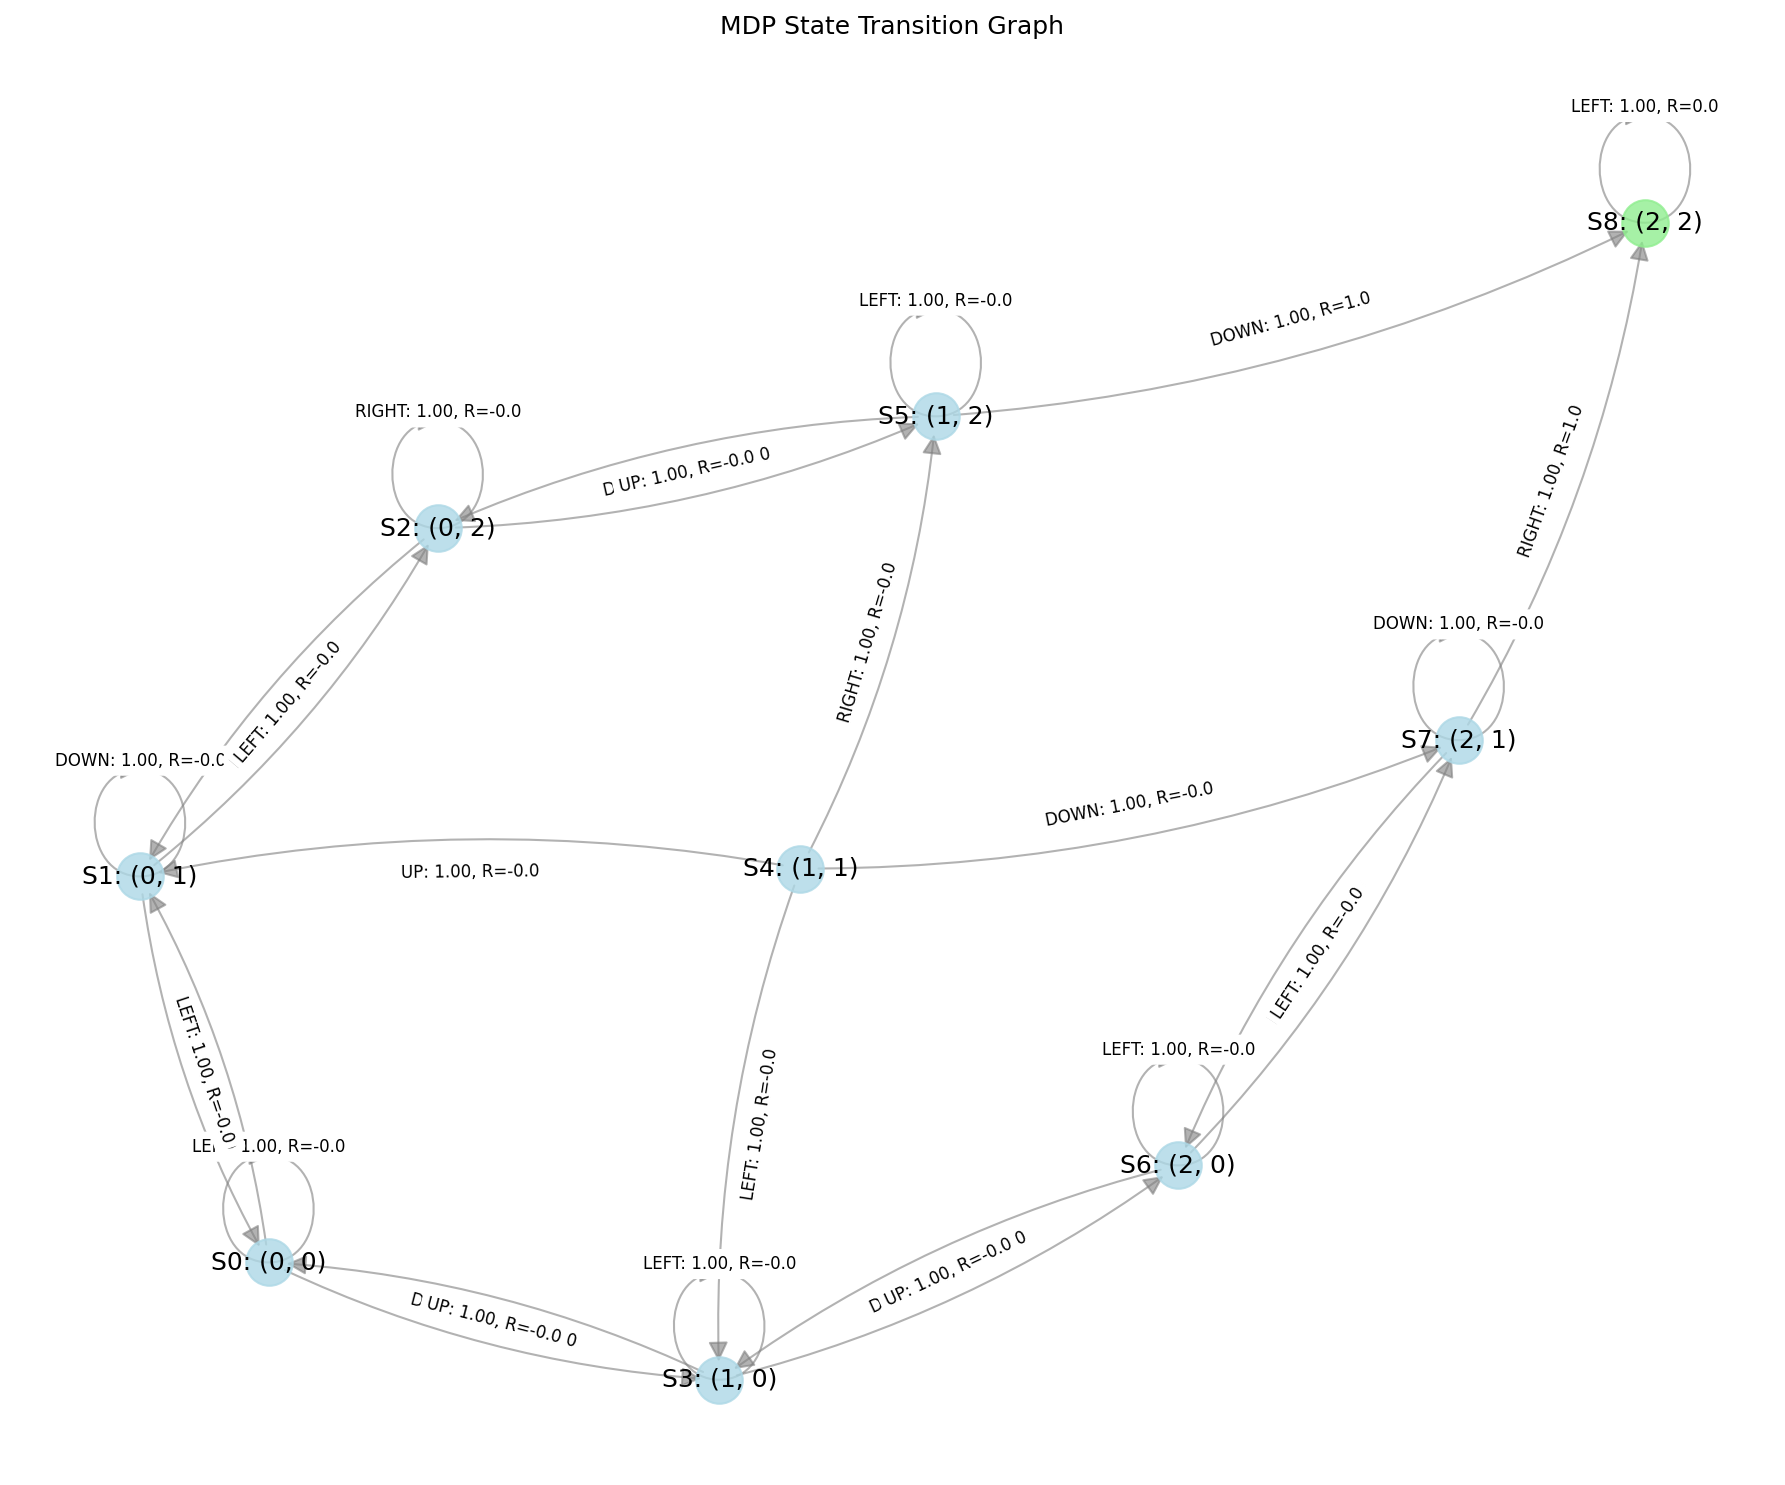

In [88]:
from qurious.visualize import visualize_mdp
import matplotlib.pyplot as plt

# 4. Environment to MDP Conversion
small_env = GridWorld(width=3, height=3, start_pos=(0, 0), goal_pos=[(2, 2)], obstacles=[(1, 1)])

print("Small grid world for MDP conversion:")
print(small_env.render())

# Convert to MDP
mdp = small_env.to_mdp()

# Inspect the MDP
print(f"MDP states: {mdp.states}")
print(f"MDP actions: {mdp.actions}")
print(f"Terminal states: {mdp.terminal_states}")

# Visualize transition probabilities for a specific state-action pair
state = small_env.state_to_index((0, 0))  # Top-left corner
action = small_env.RIGHT  # Try to move right

next_state_probs = mdp.transition_probs[state, action]
next_state_rewards = mdp.rewards[state, action]

print(f"From state {state} (position {small_env.index_to_state(state)}), taking action RIGHT:")
for next_s in range(mdp.states):
    if next_state_probs[next_s] > 0:
        print(
            f"  → state {next_s} (position {small_env.index_to_state(next_s)}) with "
            f"probability {next_state_probs[next_s]} and reward {next_state_rewards[next_s]}"
        )


# Usage example:
# Create a small grid world and convert to MDP
small_env = GridWorld(width=3, height=3, start_pos=(0, 0), goal_pos=[(2, 2)], obstacles=[(1, 1)])

print("Small grid world for MDP conversion:")
print(small_env.render())

# Convert to MDP
mdp = small_env.to_mdp()

# Visualize the MDP
fig, ax = visualize_mdp(mdp, env=small_env, layout_type="spring")
plt.tight_layout()
plt.show()

In [19]:
# Interactive Grid World Navigation with Buttons
from IPython.display import clear_output
import ipywidgets as widgets
from IPython.display import display


def create_interactive_gridworld():
    # Create a grid world with obstacles
    interactive_env = GridWorld(
        width=7,
        height=7,
        start_pos=(0, 0),
        goal_pos=[(6, 6)],
        obstacles=[(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (5, 1), (5, 2), (5, 3), (5, 4), (1, 5), (2, 5)],
        terminal_reward=10.0,
        step_penalty=0.1,
        max_steps=100,
    )

    # Reset environment
    state = interactive_env.reset()
    total_reward = 0
    done = False
    steps = 0

    # Output area for rendering the grid
    output = widgets.Output()

    # Initial render
    with output:
        clear_output(wait=True)
        print("Navigate using the buttons below. Reach the goal (G) while avoiding obstacles (#).")
        print(f"Steps: {steps}, Total Reward: {total_reward}")
        print(interactive_env.render())

    # Button handlers
    def move_up(b):
        nonlocal state, total_reward, done, steps
        if not done:
            next_state, reward, done, info = interactive_env.step(interactive_env.UP)
            update_state(next_state, reward, done)

    def move_right(b):
        nonlocal state, total_reward, done, steps
        if not done:
            next_state, reward, done, info = interactive_env.step(interactive_env.RIGHT)
            update_state(next_state, reward, done)

    def move_down(b):
        nonlocal state, total_reward, done, steps
        if not done:
            next_state, reward, done, info = interactive_env.step(interactive_env.DOWN)
            update_state(next_state, reward, done)

    def move_left(b):
        nonlocal state, total_reward, done, steps
        if not done:
            next_state, reward, done, info = interactive_env.step(interactive_env.LEFT)
            update_state(next_state, reward, done)

    def reset(b):
        nonlocal state, total_reward, done, steps
        state = interactive_env.reset()
        total_reward = 0
        done = False
        steps = 0
        with output:
            clear_output(wait=True)
            print("Navigate using the buttons below. Reach the goal (G) while avoiding obstacles (#).")
            print(f"Steps: {steps}, Total Reward: {total_reward}")
            print(interactive_env.render())

    def update_state(next_state, reward, done):
        nonlocal state, total_reward, steps
        state = next_state
        total_reward += reward
        steps += 1

        with output:
            clear_output(wait=True)

            if done:
                if interactive_env.position in interactive_env.goal_pos:
                    print("🎉 Goal reached! 🎉")
                else:
                    print("Episode ended: maximum steps reached.")

                print(f"Steps: {steps}, Total Reward: {total_reward}")
                print(interactive_env.render())
                print("Press 'Reset' to play again.")
            else:
                print("Navigate using the buttons below. Reach the goal (G) while avoiding obstacles (#).")
                print(f"Steps: {steps}, Total Reward: {total_reward}")
                print(interactive_env.render())

    # Create buttons
    button_up = widgets.Button(description="↑ Up")
    button_right = widgets.Button(description="→ Right")
    button_down = widgets.Button(description="↓ Down")
    button_left = widgets.Button(description="← Left")
    button_reset = widgets.Button(description="Reset")

    # Assign button handlers
    button_up.on_click(move_up)
    button_right.on_click(move_right)
    button_down.on_click(move_down)
    button_left.on_click(move_left)
    button_reset.on_click(reset)

    # Layout buttons in a user-friendly way
    button_layout = widgets.Layout(width="100px", height="40px")
    button_up.layout = button_layout
    button_right.layout = button_layout
    button_down.layout = button_layout
    button_left.layout = button_layout
    button_reset.layout = button_layout

    # Create navigation layout
    empty = widgets.Label(value="")
    nav_box = widgets.VBox(
        [
            widgets.HBox([empty, button_up, empty]),
            widgets.HBox([button_left, button_down, button_right]),
            widgets.HBox([empty, button_reset, empty]),
        ]
    )

    # Display everything
    display(output, nav_box)


# Run the interactive environment
create_interactive_gridworld()


Output()

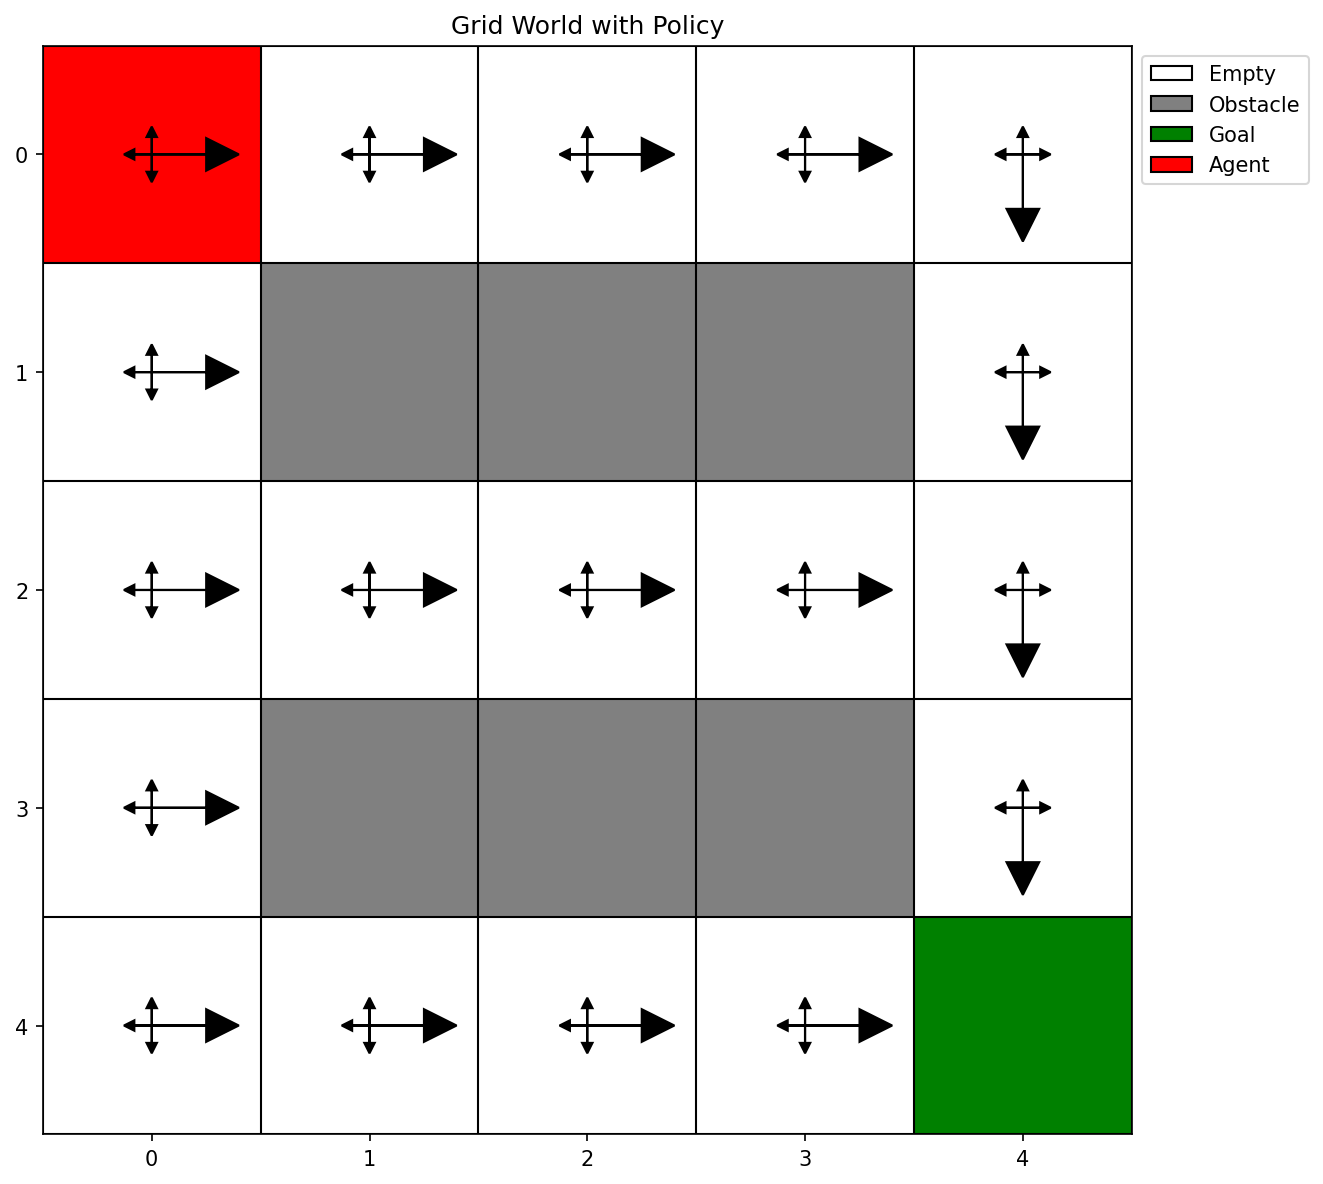

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# First, we need to set up an environment and an agent with a policy
from qurious.environments.grid_world import GridWorld
from qurious.policy import EpsilonGreedyPolicy, DeterministicTabularPolicy
from qurious.visualize import visualize_grid_world

# Create a grid world environment with obstacles
env = GridWorld(
    width=5,
    height=5,
    start_pos=(0, 0),
    goal_pos=[(4, 4)],
    obstacles=[(1, 1), (1, 2), (1, 3), (3, 1), (3, 2), (3, 3)],
    terminal_reward=10.0,
    step_penalty=0.1,
)

# Create a policy for visualization
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# We'll create a deterministic policy that always takes action RIGHT (1)
# except for states in the last column where it takes action DOWN (2)
base_policy = DeterministicTabularPolicy(n_states, n_actions)
for state in range(n_states):
    row, col = env.index_to_state(state)
    if col == env.width - 1:
        base_policy.update(state, env.DOWN)  # Last column: go down
    else:
        base_policy.update(state, env.RIGHT)  # Otherwise: go right

# Wrap it in an epsilon-greedy policy for some exploration
policy = EpsilonGreedyPolicy(base_policy, epsilon=0.1)


# Create a simple agent with this policy
class SimpleAgent:
    def __init__(self, policy):
        self.policy = policy

    def choose_action(self, state):
        return self.policy.get_action(state)


agent = SimpleAgent(policy)

# Now visualize the policy
fig, ax = visualize_grid_world(env, agent=agent, plot_type="policy")
plt.show()


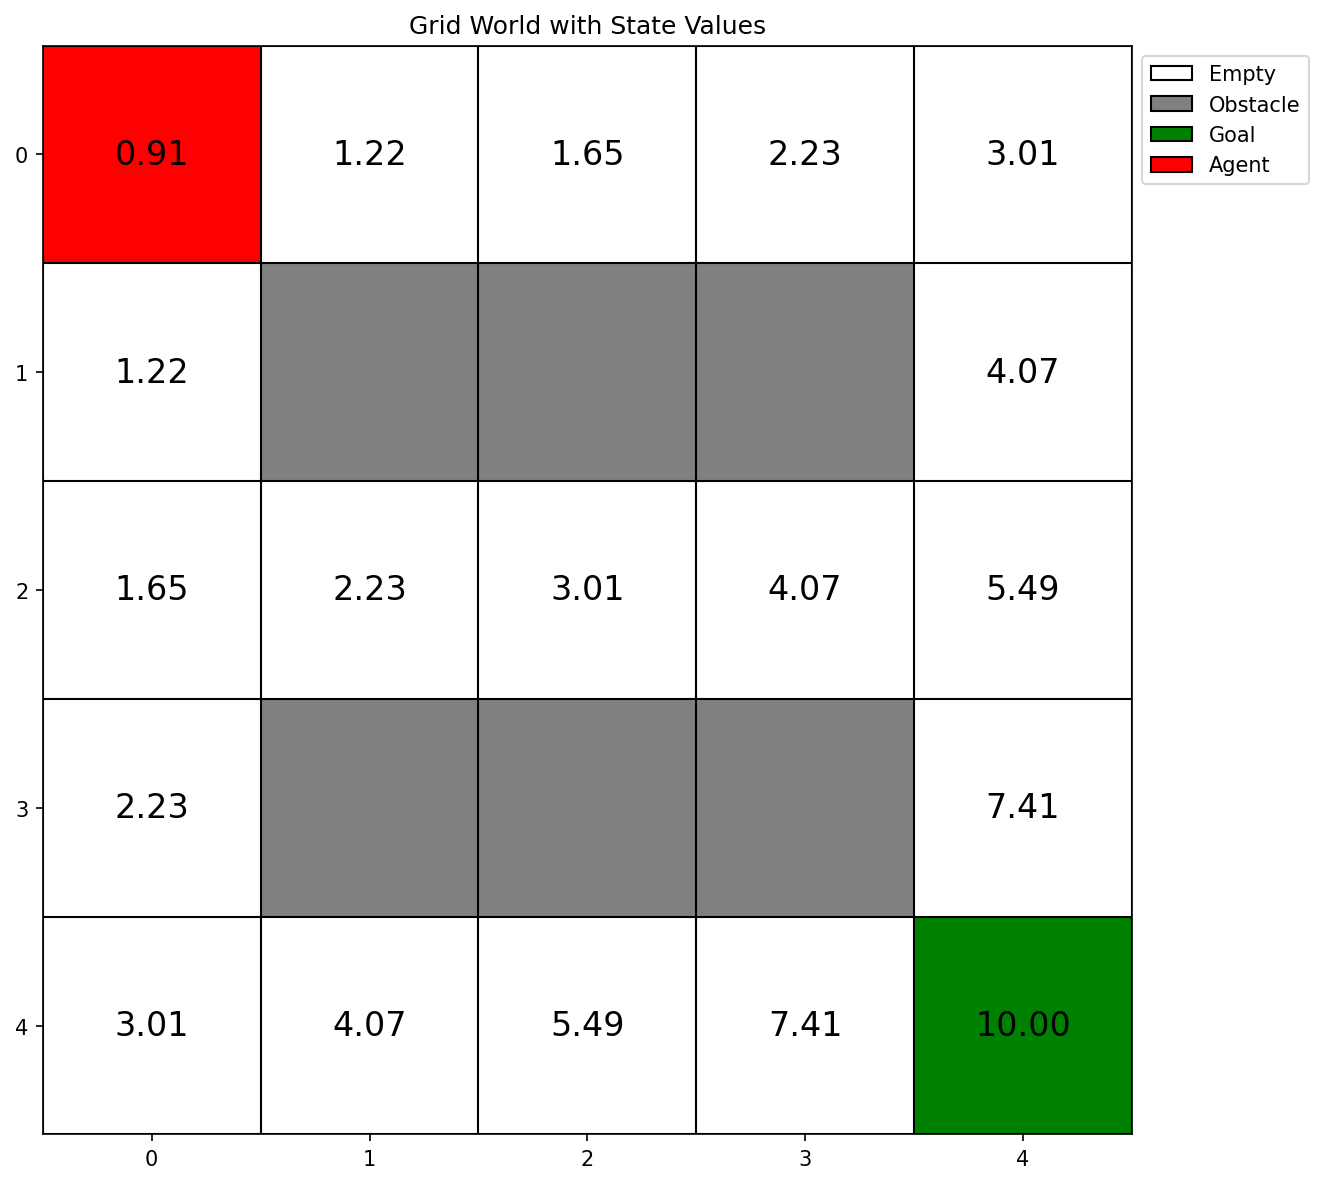

In [73]:
# Create a state value function with some example values
from qurious.value_fns import TabularStateValueFunction

# Create a value function
value_function = TabularStateValueFunction(n_states)

# Manually set some example values (in a real scenario, these would come from
# running a learning algorithm, but for demonstration we'll set them directly)
# Higher values will be assigned to states closer to the goal
for state in range(n_states):
    row, col = env.index_to_state(state)
    # Distance to goal (Manhattan distance)
    distance = abs(row - (env.height - 1)) + abs(col - (env.width - 1))
    # Value decreases with distance (max 10 near goal, min ~0 far away)
    value_function.values[state] = 10.0 * np.exp(-0.3 * distance)

    # Set obstacle states to 0
    if (row, col) in env.obstacles:
        value_function.values[state] = 0

# Visualize the state values
fig, ax = visualize_grid_world(env, value_function=value_function, plot_type="value")
plt.show()


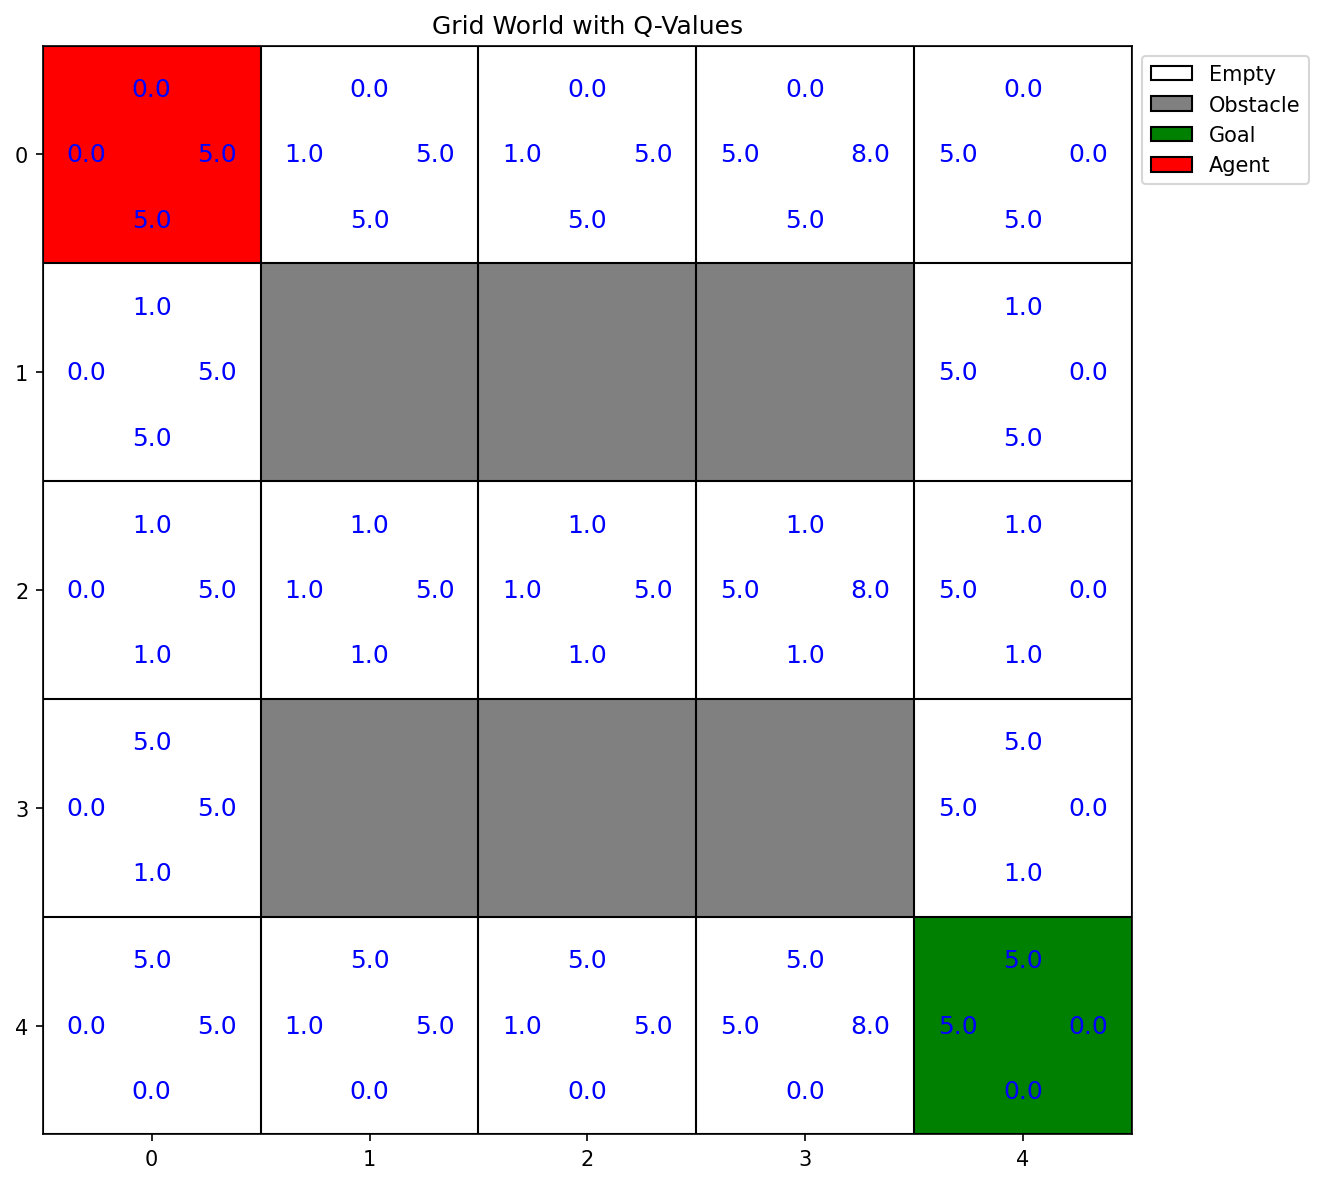

In [45]:
# Create an action-value function with some example Q-values
from qurious.value_fns import TabularActionValueFunction

# Create a Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Manually set some example Q-values
for state in range(n_states):
    row, col = env.index_to_state(state)

    # Skip obstacle states
    if (row, col) in env.obstacles:
        continue

    # Set Q-values based on how each action gets us closer to the goal
    # UP action
    if row > 0:  # Not top row
        # Value based on whether this action moves toward goal
        q_function.values[state, env.UP] = 5.0 if row > env.height // 2 else 1.0

    # RIGHT action
    if col < env.width - 1:  # Not rightmost column
        q_function.values[state, env.RIGHT] = 5.0 if col < env.width - 2 else 8.0

    # DOWN action
    if row < env.height - 1:  # Not bottom row
        q_function.values[state, env.DOWN] = 5.0 if row < env.height // 2 else 1.0

    # LEFT action
    if col > 0:  # Not leftmost column
        q_function.values[state, env.LEFT] = 5.0 if col > env.width // 2 else 1.0

# Visualize the Q-values
fig, ax = visualize_grid_world(env, value_function=q_function, plot_type="q_values")
plt.show()
